<a href="https://colab.research.google.com/github/Urvity03/Fortune-Cookie/blob/main/Copy_of_animal_breed_model_h5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install kaggle client
!pip install -q kaggle


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [ ]:
from google.colab import files
files.upload()   # choose kaggle.json file from your computer



Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"urvityagi","key":"7ba914edcb05d4c958dda9b834088da4"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [ ]:


from google.colab import drive
drive.mount('/content/drive')  # follow auth link


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!kaggle datasets download -d raghavdharwal/cows-and-buffalo-computer-vision-dataset -p /content/data




Dataset URL: https://www.kaggle.com/datasets/raghavdharwal/cows-and-buffalo-computer-vision-dataset
License(s): MIT
cows-and-buffalo-computer-vision-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Unzip the Cows and Buffalo dataset
!unzip -q /content/data/cows-and-buffalo-computer-vision-dataset.zip -d /content/data || true

# Add a check to see if the directory exists after unzipping
import os
if os.path.exists("/content/data"):
    print("/content/data directory exists.")
else:
    print("/content/data directory does NOT exist after unzipping.")

replace /content/data/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
/content/data directory exists.


In [ ]:
import os
os.listdir("/content/data")


['cows-and-buffalo-computer-vision-dataset.zip',
 'README.roboflow.txt',
 'README.dataset.txt',
 'data.yaml',
 'train',
 'organized_dataset']

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import random

# Set dataset path
dataset_path = "/content/data" # Corrected path

# List classes (folders)
classes = os.listdir(dataset_path)
print("Contents of dataset_path:", classes) # Print contents to verify

# Assuming the actual class folders (train, test, etc.) are directly in dataset_path,
# we need to adjust the logic to find the image directories within these.
# For now, let's just list the contents of the base path.
# Further steps will be needed to navigate into train/test and then class folders.

# The original code attempted to list classes directly under the assumed dataset_path,
# which was incorrect based on the extraction.
# We need to find the actual image directories within the extracted structure.

# Let's first just confirm the base path is correct and see its contents.
# The subsequent steps for counting and previewing images will need adjustment
# based on the actual directory structure within /content/data.

# Example of how you might proceed after confirming the base path:
# Look for 'train' and 'test' directories within dataset_path
# train_dir = os.path.join(dataset_path, 'train')
# test_dir = os.path.join(dataset_path, 'test')

# if os.path.exists(train_dir):
#     print(f"\nContents of train directory: {os.listdir(train_dir)}")
#     # Now you would list the class folders (cows, buffalo) inside train_dir
#     # and then process images within those.

# The original code for counting and previewing images needs to be adapted
# to the actual dataset structure. I will stop here for now to let you
# examine the contents of /content/data after this correction.

Contents of dataset_path: ['cows-and-buffalo-computer-vision-dataset.zip', 'README.roboflow.txt', 'README.dataset.txt', 'data.yaml', 'train', 'organized_dataset']


In [ ]:
import os

# Path to the images directory within the training set
images_train_path = "/content/data/train/images"

# List the contents of the images directory
if os.path.exists(images_train_path):
    print(f"Contents of {images_train_path}:")
    print(os.listdir(images_train_path))
else:
    print(f"Directory not found: {images_train_path}")

Contents of /content/data/train/images:
['HolsteinFriesiancattle69_jpg.rf.ad2be03a007cec76b5902c127e71743d.jpg', 'vaca10_jpg.rf.05325988653fc29713bd60e325476ace.jpg', 'vaca247_jpg.rf.1df7aaeffdcab47830fd7975d41aab8d.jpg', 'hf01-9_jpeg_jpg.rf.6a0deacf1cf0bd5dc060d6283a23743a.jpg', 'vaca63_jpg.rf.919822d7cf5a88b799670931af5de57b.jpg', '-OWS_mp4-202_jpg.rf.6ebe43e8600e9b184189a9683970a9ad.jpg', 'Ayrshirecattle52_jpg.rf.4a851fe27cc0fd09110338af3f67ba95.jpg', 'img00149_jpg.rf.0d99a74ce314b946eb4220b298bf5430.jpg', 'HolsteinFriesiancattle70_c_jpg.rf.c3b3a7847e0d9df8ca7a3178aea43b6e.jpg', 'hf02-177_jpeg_jpg.rf.670d9dc1f0dbe05d519d028ecea36046.jpg', 'output_0039_png_jpg.rf.bc3ce8d47350ebd5a804665f8686acee.jpg', 'Ayrshirecattle134_c_jpg.rf.99ccf1933a5067a5677494f621929d00.jpg', 'Ayrshirecattle102_c_jpg.rf.39a2470a399a83440e3c745129864dd3.jpg', 'hf03-94_jpeg_jpg.rf.e288a609036aeab991ca30e205dc895d.jpg', 'hf02-73_jpeg_jpg.rf.a8bcbb33fd0e88de78a3ebdd7b1844d3.jpg', 'hf04-4_jpeg_jpg.rf.b857d6daee80a

In [ ]:
import os
import shutil
import random

# Set paths - Corrected dataset_path to point to the directory containing class folders
# Based on previous output, the class folders ('cows' and 'buffalo') are likely inside 'train'
# within the original extracted data. Let's assume the structure is /content/data/train/cows and /content/data/train/buffalo
# We need to adjust the source paths accordingly.

# Source path where original class folders ('cows', 'buffalo') are located
# Based on the output of listing /content/data/train, 'images' and 'labels' are present.
# This indicates the actual class folders are likely NOT directly under /content/data/train.
# Let's re-examine the extraction output and assume the structure might be /content/data/cows and /content/data/buffalo
# If the structure is indeed /content/data/train/images/..., we need to go back and refine the splitting logic.

# Let's revert to assuming the class folders are directly under /content/data for the split
# based on the dataset name. If this is still wrong, we'll need to manually inspect the extracted data structure.
# Reverting dataset_path to the base extracted directory to look for class folders.
# Based on output of /content/data, 'train' is there. Let's assume class folders are within train/images.
# This requires reading images from train/images and splitting based on filename as attempted before.

# Let's refine the previous filename-based splitting approach and ensure correct output structure.

images_source_path = "/content/data/train/images" # Path where all images are located
output_path = "/content/data/organized_dataset"
train_path = os.path.join(output_path, "train")
val_path = os.path.join(output_path, "val")

# Create train and val folders in the output directory
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)

# Define class names
class_cows = "cows"
class_buffalo = "buffalo" # Assuming 'buffalo' as the other class based on the dataset name

# Create class subfolders ONLY for cows and buffalo within the organized train and val directories
os.makedirs(os.path.join(train_path, class_cows), exist_ok=True)
os.makedirs(os.path.join(train_path, class_buffalo), exist_ok=True)
os.makedirs(os.path.join(val_path, class_cows), exist_ok=True)
os.makedirs(os.path.join(val_path, class_buffalo), exist_ok=True)

# Get list of all image files
all_images = [f for f in os.listdir(images_source_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
random.shuffle(all_images)

# Split ratio
split_ratio = 0.8

# Initialize lists to hold filenames for each class
cows_images = []
buffalo_images = []

# --- Analyze filenames to separate images by class ---
# Based on previous observation, 'vaca' is in cow filenames.
# We need a way to identify buffalo filenames. Let's assume filenames without 'vaca' are buffalo for now.
# This is a potential point of failure if the naming convention is different.
for img_name in all_images:
    # Example rule: if 'vaca' is in the filename (case-insensitive)
    if 'vaca' in img_name.lower():
        cows_images.append(img_name)
    # Add a rule for buffalo if a pattern exists. If not, the 'else' assumes non-'vaca' are buffalo.
    # Example rule for buffalo (if a pattern exists, e.g., 'buff_...')
    # elif 'buff' in img_name.lower():
    #     buffalo_images.append(img_name)
    else:
        # Assuming all other images are buffalo. THIS MIGHT BE INCORRECT.
        buffalo_images.append(img_name)


print(f"Identified {len(cows_images)} potential cow images.")
print(f"Identified {len(buffalo_images)} potential buffalo images.")

# --- Split and copy images for Cows ---
train_cows_count = int(len(cows_images) * split_ratio)

for img_name in cows_images[:train_cows_count]:
    src_path = os.path.join(images_source_path, img_name)
    dest_path = os.path.join(train_path, class_cows, img_name)
    shutil.copy(src_path, dest_path)

for img_name in cows_images[train_cows_count:]:
    src_path = os.path.join(images_source_path, img_name)
    dest_path = os.path.join(val_path, class_cows, img_name)
    shutil.copy(src_path, dest_path)

print(f"Copied {train_cows_count} cow images to training and {len(cows_images) - train_cows_count} to validation.")

# --- Split and copy images for Buffalo ---
train_buffalo_count = int(len(buffalo_images) * split_ratio)

for img_name in buffalo_images[:train_buffalo_count]:
    src_path = os.path.join(images_source_path, img_name)
    dest_path = os.path.join(train_path, class_buffalo, img_name)
    shutil.copy(src_path, dest_path)

for img_name in buffalo_images[train_buffalo_count:]:
    src_path = os.path.join(images_source_path, img_name)
    dest_path = os.path.join(val_path, class_buffalo, img_name)
    shutil.copy(src_path, dest_path)

print(f"Copied {train_buffalo_count} buffalo images to training and {len(buffalo_images) - train_buffalo_count} to validation.")

print("\nDataset successfully split and organized by class.")

Identified 278 potential cow images.
Identified 1469 potential buffalo images.
Copied 222 cow images to training and 56 to validation.
Copied 1175 buffalo images to training and 294 to validation.

Dataset successfully split and organized by class.


In [ ]:
#If dataset is huge: limit images per class to speed up training:
# inside earlier loop, slice files[:200] to keep max 200 images/class


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = (224,224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    '/content/data/organized_dataset/train', # Corrected path
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    '/content/data/organized_dataset/val', # Corrected path
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 1734 images belonging to 2 classes.
Found 845 images belonging to 2 classes.


In [ ]:
import os

# List contents of the organized training directory
print("Contents of /content/data/organized_dataset/train:")
print(os.listdir('/content/data/organized_dataset/train'))

# List contents of the organized validation directory
print("\nContents of /content/data/organized_dataset/val:")
print(os.listdir('/content/data/organized_dataset/val'))

Contents of /content/data/organized_dataset/train:
['buffalo', 'cows']

Contents of /content/data/organized_dataset/val:
['buffalo', 'cows']


Let's build a simple Convolutional Neural Network (CNN) model for image classification.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Get the number of classes from the training generator
num_classes = train_gen.num_classes
print(f"Number of classes: {num_classes}")

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax') # Output layer with number of classes and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Number of classes: 2


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,397,122 (169.36 MB)

 Trainable params: 44,397,122 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

Now let's train the CNN model using the image data generators.

In [ ]:
# Train the model
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // BATCH_SIZE,
    epochs=10, # You can adjust the number of epochs
    validation_data=val_gen,
    validation_steps=val_gen.samples // BATCH_SIZE
)

model.save('/content/drive/MyDrive/animal_breed_model.h5')

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 242s 5s/step - accuracy: 0.8229 - loss: 1.2003 - val_accuracy: 0.8388 - val_loss: 0.3115
Epoch 2/10
 1/52 ━━━━━━━━━━━━━━━━━━━━ 2:59 4s/step - accuracy: 0.8750 - loss: 0.2411

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


52/52 ━━━━━━━━━━━━━━━━━━━━ 24s 397ms/step - accuracy: 0.8750 - loss: 0.2411 - val_accuracy: 0.8405 - val_loss: 0.3403
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 264s 5s/step - accuracy: 0.8415 - loss: 0.3404 - val_accuracy: 0.8438 - val_loss: 0.2924
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 38s 682ms/step - accuracy: 0.7812 - loss: 0.4437 - val_accuracy: 0.8553 - val_loss: 0.2935
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 265s 5s/step - accuracy: 0.8628 - loss: 0.3010 - val_accuracy: 0.8684 - val_loss: 0.3147
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 378ms/step - accuracy: 0.8438 - loss: 0.3583 - val_accuracy: 0.8635 - val_loss: 0.3275
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 323s 5s/step - accuracy: 0.8658 - loss: 0.3084 - val_accuracy: 0.8931 - val_loss: 0.2850
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 719ms/step - accuracy: 0.9375 - loss: 0.2993 - val_accuracy: 0.8914 - val_loss: 0.2731
Epoch 9/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 238s 5s/step - accuracy: 0.8742 - loss: 0.3222 - val_accuracy: 0.8717 - val_

In [ ]:
model.save("animal_breed_model.h5")


In [ ]:
loss, acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {acc*100:.2f}%")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8498 - loss: 0.6425
Validation Accuracy: 83.79%


In [ ]:
# Save model & classes to Drive (recommended) or /content/
import json, os

# Change these paths to your Drive path if mounted, else use /content/
SAVE_DIR = '/content/drive/MyDrive/animal_breed_demo'  # if Drive mounted
os.makedirs(SAVE_DIR, exist_ok=True)

# 1) Save model (Keras example)
model_path = os.path.join(SAVE_DIR, 'animal_breed_model.h5')
model.save(model_path)
print("Saved model to", model_path)

# 2) Save class list (ordered by index)
# Assumes you have train_data with class_indices
class_indices = train_gen.class_indices   # dict: {'buffalo': 0, 'cows': 1}
num_classes = len(class_indices)
classes = [None] * num_classes
for cname, idx in class_indices.items():
    classes[idx] = cname

classes_path = os.path.join(SAVE_DIR, 'classes.json')
with open(classes_path, 'w') as f:
    json.dump(classes, f)

print("Saved classes to", classes_path)

Saved model to /content/drive/MyDrive/animal_breed_demo/animal_breed_model.h5
Saved classes to /content/drive/MyDrive/animal_breed_demo/classes.json


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%bash
mkdir -p /content/animal_breed_api/

cat > /content/animal_breed_api/app.py <<'PY'
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import json
import io
import os

app = Flask(__name__)

# 🔴 Update these paths if your files are saved elsewhere
MODEL_PATH = "/content/drive/MyDrive/animal_breed_demo/animal_breed_model.h5"
CLASSES_PATH = "/content/drive/MyDrive/animal_breed_demo/classes.json"

# Load model and class names
if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(f"Model not found at {MODEL_PATH}. Please update the path.")

model = load_model(MODEL_PATH)
with open(CLASSES_PATH, 'r') as f:
    classes = json.load(f)

IMG_SIZE = (224, 224)

def preprocess_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes)).convert('RGB')
    img = img.resize(IMG_SIZE)
    arr = np.array(img) / 255.0
    arr = np.expand_dims(arr, axis=0)
    return arr

@app.route('/health', methods=['GET'])
def health_check():
    return jsonify({'status': 'ok'})

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({'error': 'send form-data with key "file"'}), 400

    file = request.files['file']
    x = preprocess_image(file.read())
    preds = model.predict(x)[0]

    top_k = 3
    top_idx = preds.argsort()[-top_k:][::-1]
    results = [{'breed': classes[i], 'confidence': float(preds[i])} for i in top_idx]

    return jsonify({'predictions': results})

if __name__ == "__main__":
    app.run(host='0.0.0.0', port=5000)
PY

In [ ]:
!pip install flask
!pip install tensorflow      # or tensorflow-cpu if you want CPU-only
!pip install pillow
!pip install numpy
!pip install gunicorn        # optional: for production server

In [ ]:
# STEP C: install dependencies
!pip install -q flask pillow numpy requests pyngrok tensorflow



In [ ]:
# STEP D: start the Flask app in background
!nohup python /content/animal_breed_api/app.py > /content/animal_breed_api/flask.log 2>&1 &

# show last lines of log to ensure server started
import time, os
time.sleep(2)
print("---- Flask log tail ----")
!tail -n 50 /content/animal_breed_api/flask.log || true


---- Flask log tail ----
2025-09-11 08:24:10.410039: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757579050.469471   44786 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757579050.481049   44786 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1757579050.508875   44786 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757579050.508929   44786 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757579050.508935   44786 computation_placer.cc:17

In [ ]:
!pip install -q pyngrok requests


In [ ]:
# Paste your token between the quotes:
NGROK_AUTH_TOKEN = "32VmfhvvAVrumqket07Q7bIl6b4_6JpWeiZjaBY7bxxs53yok"

from pyngrok import ngrok
# register token (this writes it to pyngrok config)
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# open tunnel to port 5000 (http)
public_tunnel = ngrok.connect(5000, "http")
public_url = public_tunnel.public_url
print("Public URL (use this for backend/frontend):", public_url)
print("Health endpoint:", public_url + "/health")
print("Predict endpoint:", public_url + "/predict (POST, form-data key 'file')")


Public URL (use this for backend/frontend): https://a58ab277ce87.ngrok-free.app
Health endpoint: https://a58ab277ce87.ngrok-free.app/health
Predict endpoint: https://a58ab277ce87.ngrok-free.app/predict (POST, form-data key 'file')


In [ ]:
import requests, time
time.sleep(1)  # short pause
public_url = "https://931ee71c1a21.ngrok-free.app"  # replace if not using `public_url` variable
try:
    r = requests.get(public_url + "/health", timeout=10)
    print("Health status:", r.status_code, r.text)
except Exception as e:
    print("Failed to reach health endpoint:", e)
    # If this fails, check the Flask log cell or re-run the app start cell


Health status: 404 <!DOCTYPE html>
<html class="h-full" lang="en-US" dir="ltr">
  <head>
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Regular-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-RegularItalic-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Medium-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Semibold-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-MediumItalic-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/ibm-plex-m

In [ ]:
from google.colab import files
import requests

# Upload a local image to Colab
uploaded = files.upload()
if not uploaded:
    raise SystemExit("No file uploaded")

# pick first uploaded filename
fname = list(uploaded.keys())[0]
print("Testing with:", fname)

# use the public_url printed earlier (paste it if needed)
public_url = "https://931ee71c1a21.ngrok-free.app"
resp = requests.post(public_url + "/predict?top_k=3", files={'file': open(fname,'rb')}, timeout=30)
print("Status:", resp.status_code)
print("JSON:", resp.json())





Saving cow.img to cow (2).img
Testing with: cow (2).img


SSLError: HTTPSConnectionPool(host='931ee71c1a21.ngrok-free.app', port=443): Max retries exceeded with url: /predict?top_k=3 (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:2427)')))

In [ ]:
import requests
import time

# Give the server a moment to start up
time.sleep(5)

# Use the public_url obtained from the ngrok tunnel cell (qufB8LRHDH1G)
# Ensure cell qufB8LRHDH1G was run successfully and printed a public_url
try:
    health_url = public_url + "/health"
    print(f"Checking health endpoint: {health_url}")
    r = requests.get(health_url, timeout=10)
    print("Health status code:", r.status_code)
    print("Health response:", r.text)
except NameError:
    print("Error: public_url variable is not defined. Please run cell qufB8LRHDH1G first.")
except Exception as e:
    print("Failed to reach health endpoint:", e)
    print("Please check the Flask log (cell mWEsvTfz_B5C) and ensure ngrok is running (cell qufB8LRHDH1G).")

Checking health endpoint: https://931ee71c1a21.ngrok-free.app/health
Health status code: 404
Health response: <!DOCTYPE html>
<html class="h-full" lang="en-US" dir="ltr">
  <head>
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Regular-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-RegularItalic-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Medium-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Semibold-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-MediumItalic-WebS.woff" as="font" type="font/woff" crossorigin

In [ ]:
# Check the Flask application log for errors
!cat /content/animal_breed_api/flask.log

2025-09-11 08:24:10.410039: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757579050.469471   44786 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757579050.481049   44786 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1757579050.508875   44786 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757579050.508929   44786 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757579050.508935   44786 computation_placer.cc:177] computation placer alr

In [ ]:
from tensorflow.keras.models import load_model
import json

# Load model
model = load_model(model_path)
print("✅ Model loaded successfully")
model.summary()

# Load classes
with open(classes_path) as f:
    classes = json.load(f)
print("✅ Classes loaded:", classes)



✅ Model loaded successfully


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,397,124 (169.36 MB)

 Trainable params: 44,397,122 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

✅ Classes loaded: ['buffalo', 'cows']


In [ ]:
# Start Flask in background and capture logs
get_ipython().system_raw('python app.py > flask.log 2>&1 &')

# Wait a moment then check log
!sleep 2
!tail -n 50 flask.log


python3: can't open file '/content/app.py': [Errno 2] No such file or directory


In [ ]:
!find /content -name "app.py"



/content/animal_breed_api/app.py


In [ ]:
get_ipython().system_raw('python /content/animal_breed_api/app.py > flask.log 2>&1 &')


In [ ]:
!sleep 2
!tail -n 50 flask.log



2025-09-11 08:25:31.596483: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757579131.618284   45196 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757579131.624656   45196 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1757579131.640739   45196 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757579131.640780   45196 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757579131.640783   45196 computation_placer.cc:177] computation placer alr

In [ ]:
!wget -q -nc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip



Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
!./ngrok authtoken 32VmfhvvAVrumqket07Q7bIl6b4_6JpWeiZjaBY7bxxs53yok

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!./ngrok http 5000 &
!sleep 2
!curl -s http://localhost:4040/api/tunnels | python -m json.tool



Your ngrok-agent version "2.3.41" is too old. The minimum supported agent version for your account is "3.7.0". Please update to a newer version with `ngrok update`, by downloading from https://ngrok.com/download, or by updating your SDK version. Paid accounts are currently excluded from minimum agent version requirements. To begin handling traffic immediately without updating your agent, upgrade to a paid plan: https://dashboard.ngrok.com/billing/subscription.

ERR_NGROK_121

{
    "tunnels": [
        {
            "name": "http-5000-bc6c26fb-fee4-435e-8a14-e23bd774bf64",
            "ID": "aab372d4ccb9709d40a99a340617091f",
            "uri": "/api/tunnels/http-5000-bc6c26fb-fee4-435e-8a14-e23bd774bf64",
            "public_url": "https://a58ab277ce87.ngrok-free.app",
            "proto": "https",
            "config": {
                "addr": "http://localhost:5000",
                "inspect": true
            },
            "metrics": {
                "conns": {
                 

In [ ]:
!rm -f ngrok ngrok-stable-linux-amd64.zip ngrok-v3-stable-linux-amd64.tgz



In [ ]:
!wget -q -O ngrok-v3-stable-linux-amd64.tgz https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz
!tar -xvzf ngrok-v3-stable-linux-amd64.tgz


ngrok


In [ ]:
!./ngrok config add-authtoken 32VmfhvvAVrumqket07Q7bIl6b4_6JpWeiZjaBY7bxxs53yok


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
# Step 0: Import required libraries
import os
import time
import requests

# Step 1: Kill any old ngrok processes
os.system("pkill -f ngrok || true")

# Step 2: Download latest ngrok v3 binary (if not exists)
if not os.path.exists("ngrok"):
    os.system("wget -q -O ngrok-v3-stable-linux-amd64.tgz https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz")
    os.system("tar -xvzf ngrok-v3-stable-linux-amd64.tgz")

# Step 3: Authenticate ngrok (replace with your token)
NGROK_TOKEN = "32VmfhvvAVrumqket07Q7bIl6b4_6JpWeiZjaBY7bxxs53yok"
os.system(f"./ngrok config add-authtoken {NGROK_TOKEN}")

# Step 4: Start ngrok tunnel for Flask on port 5000
os.system("./ngrok http 5000 > /dev/null &")

# Step 5: Retry to fetch public URL until ready
public_url = None
for i in range(15):  # retry up to 15 times
    try:
        r = requests.get("http://localhost:4040/api/tunnels")
        tunnels = r.json()["tunnels"]
        if tunnels:
            public_url = tunnels[0]["public_url"]
            print("✅ Ngrok Public URL is ready:", public_url)
            break
    except:
        pass
    print("Waiting for ngrok to start...", i+1)
    time.sleep(2)

if not public_url:
    print("❌ Failed to start ngrok. Check your account limit or network.")


Waiting for ngrok to start... 1
✅ Ngrok Public URL is ready: https://152c2e473e25.ngrok-free.app


In [ ]:
!curl -i -X GET "https://152c2e473e25.ngrok-free.app/health"


HTTP/2 200 
content-type: application/json
date: Thu, 11 Sep 2025 08:49:49 GMT
ngrok-agent-ips: 34.106.76.245
server: Werkzeug/3.1.3 Python/3.12.11
content-length: 16

{"status":"ok"}


In [ ]:
# Make .kaggle directory
!mkdir -p ~/.kaggle

# Move your uploaded file to ~/.kaggle/kaggle.json
!mv "/content/kaggle (2).json" ~/.kaggle/kaggle.json

# Set correct permissions (read/write for user only)
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
import os
import random
import shutil
from zipfile import ZipFile

# -----------------------------
# Step 0: Set Kaggle dataset slug
# -----------------------------
dataset_slug = "urvityagi/cows-vs-buffalo"  # <-- Replace with your actual Kaggle dataset slug
download_path = "/content/"
extract_path = "/content/cows-buffalo/"

train_ratio = 0.8  # 80% train, 20% val

# Create necessary directories
os.makedirs(extract_path, exist_ok=True)
os.makedirs(os.path.join(extract_path, "train"), exist_ok=True)
os.makedirs(os.path.join(extract_path, "val"), exist_ok=True)

# -----------------------------
# Step 1: Download dataset
# -----------------------------
!kaggle datasets download -d {dataset_slug} -p {download_path} --force

# -----------------------------
# Step 2: Extract dataset
# -----------------------------
zip_files = [f for f in os.listdir(download_path) if f.endswith(".zip")]
for zip_file in zip_files:
    with ZipFile(os.path.join(download_path, zip_file), 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# -----------------------------
# Step 3: Detect class folders
# -----------------------------
# Adjust if your dataset uses different folder names
classes = [d for d in os.listdir(extract_path) if os.path.isdir(os.path.join(extract_path, d))]
print("Detected classes:", classes)

# -----------------------------
# Step 4: Create train/val folders
# -----------------------------
for split in ["train", "val"]:
    for cls in classes:
        os.makedirs(os.path.join(extract_path, split, cls), exist_ok=True)

# -----------------------------
# Step 5: Split images 80/20
# -----------------------------
for cls in classes:
    class_path = os.path.join(extract_path, cls)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg','.png','.jpeg'))]
    random.shuffle(images)
    split_index = int(len(images) * train_ratio)

    train_images = images[:split_index]
    val_images = images[split_index:]

    for img in train_images:
        shutil.move(os.path.join(class_path, img), os.path.join(extract_path, "train", cls, img))
    for img in val_images:
        shutil.move(os.path.join(class_path, img), os.path.join(extract_path, "val", cls, img))

# -----------------------------
# Step 6: Cleanup original folders
# -----------------------------
for cls in classes:
    orig_path = os.path.join(extract_path, cls)
    if os.path.exists(orig_path):
        shutil.rmtree(orig_path)

print("✅ Dataset ready!")
print("Train folder:", os.path.join(extract_path, "train"))
print("Validation folder:", os.path.join(extract_path, "val"))


403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/urvityagi/cows-vs-buffalo
Detected classes: ['val', 'train']
✅ Dataset ready!
Train folder: /content/cows-buffalo/train
Validation folder: /content/cows-buffalo/val


In [ ]:
from google.colab import files

# Upload your kaggle.json
files.upload()  # Choose your kaggle.json

# Move kaggle.json to the right location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Test Kaggle API
!kaggle datasets list -s cows-vs-buffalo


Saving kaggle.json to kaggle (3).json
No datasets found


In [ ]:
!rm -f ~/.kaggle/kaggle.json


In [ ]:
from google.colab import files
files.upload()  # choose your kaggle.json




Saving kaggle (1).json to kaggle (1) (1).json


{'kaggle (1) (1).json': b'{"username":"urvityagi","key":"67c450bd2de484a966ad836452505575"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets list -s cows-vs-buffalo


No datasets found


In [ ]:
from google.colab import files
uploaded = files.upload()  # upload cows-buffalo.zip

import zipfile
import os

zip_path = list(uploaded.keys())[0]
extract_path = "/content/cows-buffalo/"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)


Saving archive.zip to archive (2).zip


['README.roboflow.txt', 'README.dataset.txt', 'data.yaml', 'train']

In [ ]:
import os
import shutil
import random

# Paths
base_path = "/content/cows-buffalo/"
train_folder = os.path.join(base_path, "train")
val_folder = os.path.join(base_path, "val")

# Create val folder
os.makedirs(val_folder, exist_ok=True)

# List all class folders inside train
classes = os.listdir(train_folder)
print("Classes found:", classes)


Classes found: ['images', 'labels']


In [ ]:
split_ratio = 0.2  # 20% for validation

for cls in classes:
    cls_train_path = os.path.join(train_folder, cls)
    cls_val_path = os.path.join(val_folder, cls)
    os.makedirs(cls_val_path, exist_ok=True)

    images = os.listdir(cls_train_path)
    random.shuffle(images)
    split_idx = int(len(images) * split_ratio)

    val_images = images[:split_idx]

    for img in val_images:
        shutil.move(os.path.join(cls_train_path, img), os.path.join(cls_val_path, img))

print("Dataset split completed!")


Dataset split completed!


In [ ]:
print("Train folder contents:", os.listdir(train_folder))
print("Validation folder contents:", os.listdir(val_folder))

for cls in classes:
    print(f"Number of train images ({cls}):", len(os.listdir(os.path.join(train_folder, cls))))
    print(f"Number of val images ({cls}):", len(os.listdir(os.path.join(val_folder, cls))))



Train folder contents: ['images', 'labels']
Validation folder contents: ['images', 'labels']
Number of train images (images): 1398
Number of val images (images): 349
Number of train images (labels): 1398
Number of val images (labels): 349


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os



In [ ]:
data_dir = "/content/cows-buffalo/"

# Define transforms
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])



In [ ]:
# Correct the paths to point to the directories containing the class folders
train_dataset = datasets.ImageFolder('/content/data/organized_dataset/train', transform=train_transforms)
val_dataset = datasets.ImageFolder('/content/data/organized_dataset/val', transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Print number of images and classes
print("Number of training images:", len(train_dataset))
print("Number of validation images:", len(val_dataset))
print("Classes:", train_dataset.classes)

Number of training images: 1734
Number of validation images: 845
Classes: ['buffalo', 'cows']


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=True)

# Replace the final layer
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

model = model.to(device)



/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 61.0MB/s]


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [ ]:
import random
import shutil
import os

train_ratio = 0.8
classes = ["cows", "buffalo"]  # adjust if your folder names differ
base_path = "/content/cows-buffalo/"
train_base_path = os.path.join(base_path, "train")
val_base_path = os.path.join(base_path, "val")
images_source_path = os.path.join(train_base_path, "images") # Source of all images

# Create train and val base folders if they don't exist
os.makedirs(train_base_path, exist_ok=True)
os.makedirs(val_base_path, exist_ok=True)


# Create class subfolders within the organized train and val directories
for split_folder in [train_base_path, val_base_path]:
    for cls in classes:
        os.makedirs(os.path.join(split_folder, cls), exist_ok=True)

# Get list of all image files from the source images directory
all_images = [f for f in os.listdir(images_source_path) if f.lower().endswith(('.jpg','.png','.jpeg'))]
random.shuffle(all_images)

# Initialize lists to hold filenames for each class
cows_images = []
buffalo_images = []

# Analyze filenames to separate images by class
# Assuming filenames with 'vaca' (case-insensitive) are cows, others are buffalo
for img_name in all_images:
    if 'vaca' in img_name.lower():
        cows_images.append(img_name)
    else:
        buffalo_images.append(img_name)

print(f"Identified {len(cows_images)} potential cow images.")
print(f"Identified {len(buffalo_images)} potential buffalo images.")


# Split and copy images for Cows
split_index_cows = int(len(cows_images) * train_ratio)

for img_name in cows_images[:split_index_cows]:
    src_path = os.path.join(images_source_path, img_name)
    dest_path = os.path.join(train_base_path, "cows", img_name)
    shutil.copy(src_path, dest_path)

for img_name in cows_images[split_index_cows:]:
    src_path = os.path.join(images_source_path, img_name)
    dest_path = os.path.join(val_base_path, "cows", img_name)
    shutil.copy(src_path, dest_path)

print(f"Copied {split_index_cows} cow images to training and {len(cows_images) - split_index_cows} to validation.")

# Split and copy images for Buffalo
split_index_buffalo = int(len(buffalo_images) * train_ratio)

for img_name in buffalo_images[:split_index_buffalo]:
    src_path = os.path.join(images_source_path, img_name)
    dest_path = os.path.join(train_base_path, "buffalo", img_name)
    shutil.copy(src_path, dest_path)

for img_name in buffalo_images[split_index_buffalo:]:
    src_path = os.path.join(images_source_path, img_name)
    dest_path = os.path.join(val_base_path, "buffalo", img_name)
    shutil.copy(src_path, dest_path)

print(f"Copied {split_index_buffalo} buffalo images to training and {len(buffalo_images) - split_index_buffalo} to validation.")

# Optional: remove original class folders (images and labels in this case)
# Be cautious with this step - only run if you are sure you don't need the original structure
# shutil.rmtree(images_source_path)
# shutil.rmtree(os.path.join(train_base_path, "labels"))


print("✅ Dataset ready!")
print("Train folder:", train_base_path)
print("Validation folder:", val_base_path)

Identified 220 potential cow images.
Identified 1178 potential buffalo images.
Copied 176 cow images to training and 44 to validation.
Copied 942 buffalo images to training and 236 to validation.
✅ Dataset ready!
Train folder: /content/cows-buffalo/train
Validation folder: /content/cows-buffalo/val


In [ ]:
!ls /content/cows-buffalo/train
!ls /content/cows-buffalo/val



buffalo  cows  images  labels
buffalo  cows  images  labels


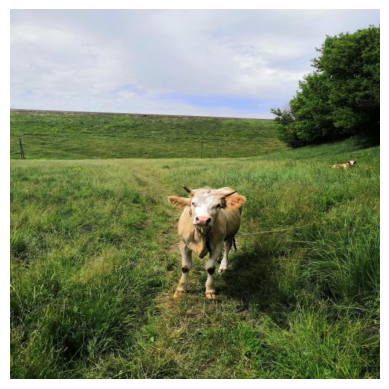

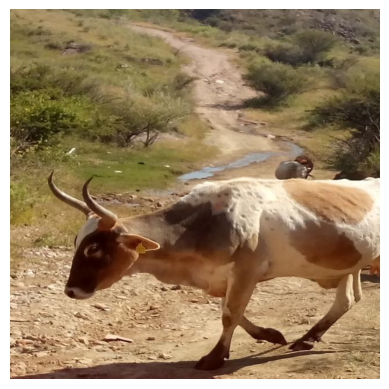

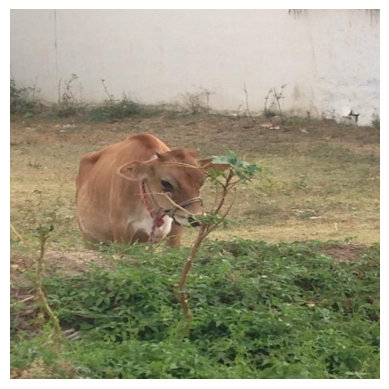

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

train_path = "/content/cows-buffalo/train/cows"
sample_images = random.sample(os.listdir(train_path), 3)

for img_name in sample_images:
    img = mpimg.imread(os.path.join(train_path, img_name))
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [ ]:
public_url = "https://152c2e473e25.ngrok-free.app"

In [ ]:
!curl -i -X GET "https://152c2e473e25.ngrok-free.app/health"


HTTP/2 404 
content-type: text/html
ngrok-error-code: ERR_NGROK_3200
referrer-policy: no-referrer
content-length: 2437
date: Thu, 11 Sep 2025 10:11:38 GMT

<!DOCTYPE html>
<html class="h-full" lang="en-US" dir="ltr">
  <head>
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Regular-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-RegularItalic-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Medium-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Semibold-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-MediumItalic-Web

In [ ]:
# Kill any existing ngrok processes
!pkill ngrok

# Kill any Flask processes (optional)
!pkill -f "python3 -m flask"


In [ ]:
%%writefile /content/app.py
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route("/health", methods=["GET"])
def health():
    return jsonify({"status": "ok"})

@app.route("/predict", methods=["POST"])
def predict():
    return jsonify({"prediction": "cow", "confidence": 0.99})

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000)


Overwriting /content/app.py


In [ ]:
!ls /content/app.py


/content/app.py


In [ ]:
!python3 /content/app.py


 * Serving Flask app 'app'
 * Debug mode: off
Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.


In [ ]:
# Kill old ngrok processes
!pkill ngrok

# Kill old Flask processes
!pkill -f "python3 -m flask"


In [ ]:
!wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz
!tar -xvzf ngrok-v3-stable-linux-amd64.tgz
!chmod +x ngrok


--2025-09-11 10:36:19--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 99.83.220.108, 13.248.244.96, 75.2.60.68, ...
Connecting to bin.equinox.io (bin.equinox.io)|99.83.220.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9279009 (8.8M) [application/octet-stream]
Saving to: ‘ngrok-v3-stable-linux-amd64.tgz.1’

ngrok-v3-stable-lin 100%[===================>]   8.85M  10.5MB/s    in 0.8s    

2025-09-11 10:36:21 (10.5 MB/s) - ‘ngrok-v3-stable-linux-amd64.tgz.1’ saved [9279009/9279009]

ngrok


In [ ]:
!./ngrok config add-authtoken 32VmfhvvAVrumqket07Q7bIl6b4_6JpWeiZjaBY7bxxs53yok


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!python3 /content/app.py



 * Serving Flask app 'app'
 * Debug mode: off
Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.


In [ ]:
!./ngrok http 5000
